<a href="https://colab.research.google.com/github/shivams289/Kaggle-Projects/blob/main/Tata_Steel_vs_Subsidiary_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path1 = '/content/drive/MyDrive/stl.csv'
path3 = '/content/drive/MyDrive/bsl.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bsl = pd.read_csv(path3)
stl = pd.read_csv(path1)

In [4]:
bsl.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [5]:
bsl = bsl[['OPEN ', 'close ', 'HIGH ', 'LOW ', 'VOLUME ', 'PREV. CLOSE ']]
stl = stl[['OPEN ', 'close ', 'HIGH ', 'LOW ', 'VOLUME ', 'PREV. CLOSE ']]

In [6]:
stl.replace(',','', regex=True, inplace=True)

In [7]:
bsl = bsl.astype(float)



In [8]:
bsl['close '].dtype

dtype('float64')

In [9]:
stl = stl.astype(float)

In [10]:
stl['close '].dtype

dtype('float64')

In [11]:
print(bsl.isnull().sum())
print(stl.isnull().sum())

OPEN            0
close           0
HIGH            0
LOW             0
VOLUME          0
PREV. CLOSE     0
dtype: int64
OPEN            0
close           0
HIGH            0
LOW             0
VOLUME          0
PREV. CLOSE     0
dtype: int64


In [12]:
print(bsl.corr(), '\n')
print(stl.corr(), '\n')

                 OPEN     close      HIGH       LOW    VOLUME   PREV. CLOSE 
OPEN          1.000000  0.993037  0.994973  0.997179  0.079066      0.997906
close         0.993037  1.000000  0.997298  0.995703  0.133890      0.991868
HIGH          0.994973  0.997298  1.000000  0.993565  0.158063      0.993496
LOW           0.997179  0.995703  0.993565  1.000000  0.066827      0.996310
VOLUME        0.079066  0.133890  0.158063  0.066827  1.000000      0.063468
PREV. CLOSE   0.997906  0.991868  0.993496  0.996310  0.063468      1.000000 

                 OPEN     close      HIGH       LOW    VOLUME   PREV. CLOSE 
OPEN          1.000000  0.994483  0.997034  0.998170 -0.319638      0.998774
close         0.994483  1.000000  0.998596  0.997361 -0.285361      0.992951
HIGH          0.997034  0.998596  1.000000  0.997598 -0.277080      0.995854
LOW           0.998170  0.997361  0.997598  1.000000 -0.325421      0.996637
VOLUME       -0.319638 -0.285361 -0.277080 -0.325421  1.000000     -0.3209

In [13]:
print(bsl.tail())
print(stl.tail())

     OPEN   close   HIGH    LOW      VOLUME   PREV. CLOSE 
117  43.40   44.05  44.30  43.00   7604924.0         43.40
118  45.00   43.40  45.25  42.80   5969500.0         43.85
119  44.55   43.85  45.10  43.30  10186334.0         44.30
120  43.75   44.30  44.45  43.00   6424652.0         43.10
121  41.45   43.10  43.50  40.95   7243841.0         41.35
     OPEN   close    HIGH     LOW      VOLUME   PREV. CLOSE 
117  687.6  694.70  704.60  682.85  16340705.0        690.25
118  710.0  690.25  724.50  680.05  57397919.0        699.20
119  706.5  699.20  716.45  691.60  29337028.0        702.95
120  694.0  702.95  704.90  682.70  21462169.0        685.05
121  656.9  685.05  690.60  651.40  29100888.0        655.95


In [14]:
print(bsl.shape)
print(stl.shape)

(122, 6)
(122, 6)


In [15]:
stl.corrwith(bsl, axis = 0)

OPEN            0.930967
close           0.930457
HIGH            0.923933
LOW             0.935435
VOLUME          0.532291
PREV. CLOSE     0.933057
dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [17]:
data1 = scaler.fit_transform(stl)
data2 = scaler.fit_transform(bsl)


In [20]:
data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)

In [21]:
data1.columns = [ 'OPEN ', 'close ', 'HIGH ', 'LOW ', 'VOLUME ','PREV. CLOSE ']
data2.columns = [ 'OPEN ', 'close ', 'HIGH ', 'LOW ', 'VOLUME ','PREV. CLOSE ']

In [22]:
data1.corrwith(data2, axis = 0 )

OPEN            0.930967
close           0.930457
HIGH            0.923933
LOW             0.935435
VOLUME          0.532291
PREV. CLOSE     0.933057
dtype: float64

In [23]:
stl.corr()

,OPEN,close,HIGH,LOW,VOLUME,PREV. CLOSE
OPEN,1.000000,0.994483,0.997034,0.998170,-0.319638,0.998774
close,0.994483,1.000000,0.998596,0.997361,-0.285361,0.992951
HIGH,0.997034,0.998596,1.000000,0.997598,-0.277080,0.995854
LOW,0.998170,0.997361,0.997598,1.000000,-0.325421,0.996637
VOLUME,-0.319638,-0.285361,-0.277080,-0.325421,1.000000,-0.320942
PREV. CLOSE,0.998774,0.992951,0.995854,0.996637,-0.320942,1.000000


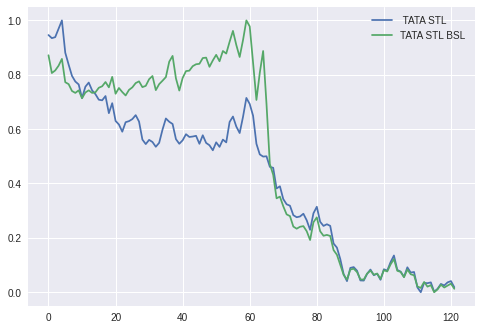

In [24]:
plt.style.use('seaborn')
plt.plot(data1['close '], label = ' TATA STL')
plt.plot(data2['close '], label = 'TATA STL BSL')
plt.legend()